<hr/>

#Data Mining [EN.550.436]
**Tamás Budavári** - budavari@jhu.edu <br/>
**Class 7** - Sept 28, 2016

- Eigensystem of covariance matrix
- Fitting lines and planes

<hr/>

<h1><font color="darkblue">Recap from last time</font></h1>

### Eigendecomposition 

- If we multiply with $E$ and $E^T$ from left and right 

> $ C = E\,\Lambda\,E^T$

> or

>$\displaystyle C = \sum_{k=1}^N\ \lambda_k\left(\boldsymbol{e}_k\,\boldsymbol{e}_k^T\right) $

### Scree Plot

- The eigenvalue spectrum

>$ \big\{ \lambda_1, \lambda_2, \dots, \lambda_N \big\}$

- How many important directions?

> Keep $K =\,?$ principal components

- Explained variance 

> Cf. $\mathbb{Var}[X\pm{}Y] = \mathbb{Var}[X]+\mathbb{Var}[Y]$

#### Generate data

In [1]:
%pylab inline
from scipy.stats import norm as gaussian
import pandas as pd

Populating the interactive namespace from numpy and matplotlib


In [9]:
# generate 10-D vectors: scale, rotate
Z = gaussian.rvs(0,1,(10,1000))
if True: # scale them here
    for i in range(Z[:,0].size): 
        Z[i,:] *= i*i #sqrt(i)
    Z[:4,:] *= 1e-7
# quick-n-dirty random rotation
M = random.randn(Z[:,0].size,Z[:,0].size)
Q,_ = np.linalg.qr(M) # QR decomposition
Y = Q.dot(Z) # random rotation
print Y.shape
np.savetxt("temp.csv", Y.T, delimiter=",")

(10L, 1000L)


In [10]:
# remove all previous variables from memory
del Y, M, Q, Z

#### Analyze data

Now your data file is available here: [temp.csv](temp.csv)

In [11]:
# re-load the Y matrix
Y = pd.read_csv('temp.csv',header=None).as_matrix().T
print Y.shape

(10L, 1000L)


In [12]:
# center Y 每行减均值and run Singular Value Decomposition
Y -= mean(Y,axis=1).reshape(Y[:,1].size,1)
U, W, _ = np.linalg.svd(Y)
E, L = U, W**2 / (Y[0,:].size-1) 

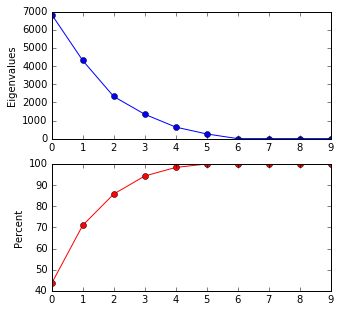

In [6]:
figure(figsize=(5,5));
subplot(211); plot(L,'o-'); ylabel('Eigenvalues');
subplot(212); cl=cumsum(L); ylabel('Percent');
plot(100*cl/cl[-1],'o-r'); 

In [7]:
# beta coefficiences after rotation,既是旋转后的点，也是系数
B = E.T.dot(Y)

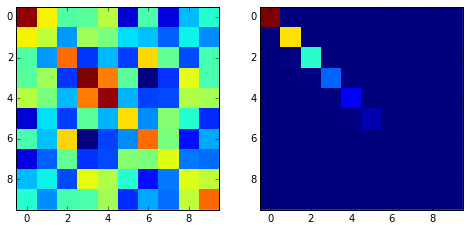

In [8]:
# plot orig and new covariance matrices (estimate w/o norm)
figure(figsize=(8,4))
subplot(121); imshow(Y.dot(Y.T),interpolation='none');
subplot(122); imshow(B.dot(B.T),interpolation='none');   #左右乘以E.T,E后，变成对角阵
#10个主成分，颜色深浅表大小，只有6个可见

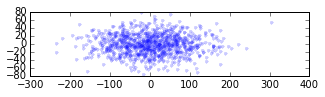

In [9]:
figure(figsize=(5,5)); subplot(111,aspect='equal')
plot(B[0,:],B[4,:], '.', alpha=0.2);

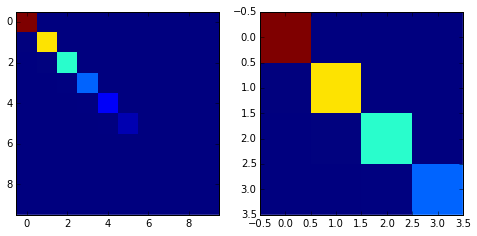

In [17]:
A = B[:4,:]
# plot orig and new covariance matrices (estimate w/o norm)
figure(figsize=(8,4))
subplot(121); imshow(B.dot(B.T),interpolation='none');
subplot(122); imshow(A.dot(A.T),interpolation='none');

### Inverse of the Covariance Matrix

- Appears in the multivariate normal distribution!

>$\displaystyle{\cal{}N}(x;\mu,C) \propto \exp\left[-\frac{1}{2}(x\!-\!\mu)^T\,C^{-1} (x\!-\!\mu)\right]$

- Inverse of the diagonal eigenvalue matrix

>$\displaystyle \Lambda^{-1} =  \left( \begin{array}{ccc}
\frac{1}{\lambda_1} &  & \cdots & 0\\
 & \frac{1}{\lambda_2} &   & \vdots\\
\vdots &  & \ddots &  \\
0 & \cdots &  & \frac{1}{\lambda_N} \\
\end{array} \right)$

- Inverse of the covariance matrix

>$\displaystyle C^{-1} = E\ \Lambda^{-1} E^T$

- Also see pseudoinverse with small eigenvalues 

### Fitting Lines

- What if $x$ and $y$ are both noisy? 

> For example, $\big\{(x_i,y_i)\big\}$ measurements have the same uncertainties. 
> The relevant residuals are perpendicular to the line.
> Minimizing RMS of residuals is related to maximizing the sample variance along line!

- Sounds like the PCA problem?


### Fitting Planes

- Similarly, fitting a $K$-dimensional hyperplane in $N$ dimensions

> Minimizing sum of square lengths of the residual vectors

>$\displaystyle \ \ \ \ \ \min \sum_i r_i^2 \ \ \ \ \ $  where $\ \ \ r_i = x_i - (a\,a^T)x_i$, 

> yields 

>$\displaystyle \ \ \ \ \ \max \sum_i \left(a^Tx_i\right)^2 \ \ \ \ \ $ 

> cf. sample variance along $a$, if data already center

- Essentially same as the PCA problem!

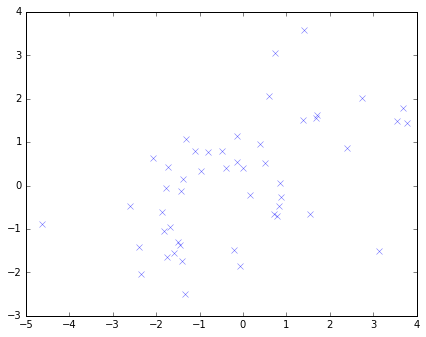

In [8]:
# generate 2D (column) vectors
np.random.seed(seed=838283);
N = gaussian.rvs(0,1,(2,50)); 
N[0,:] *= 2 
f = +pi/6   # rotate by 30 deg
R = array([[cos(f), -sin(f)],
           [sin(f),  cos(f)]]) 
X = R.dot(N)

figure(figsize=(7,7)); subplot(111,aspect='equal');
plot(X[0,:],X[1,:],'x',alpha=0.6);

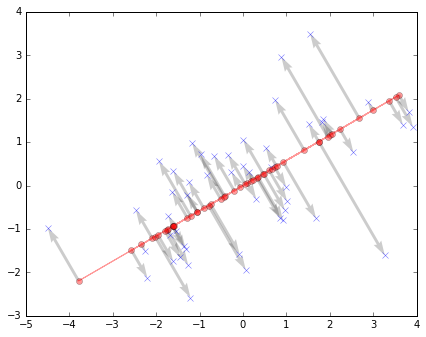

In [9]:
# PCA w/ SVD and project on 1st component
X -= mean(X, axis=1).reshape(X[:,1].size,1)
E,_,_ = linalg.svd(X) # need only eigenvecs
F = E[:,:1]           # truncated basis: only PC1
P = F.dot(F.T).dot(X) # projection
R = X - P;            # residuals

figure(figsize=(7,7)); subplot(111,aspect='equal');
plot(X[0,:],X[1,:],'xb',alpha=0.6);
plot(P[0,:],P[1,:],'-or',alpha=0.4);
quiver(P[0,:],P[1,:],R[0,:],R[1,:], alpha=0.2,
    angles='xy',scale_units='xy',scale=1);

### More on Fitting Later

- Next: Bayesian inference
- ...

In [14]:
Y=pd.read_csv('HW1/A1-Problem3.csv',header=None).as_matrix().T
mean(Y,axis=1)

array([-14.88688165, -19.26666907,   7.62639436,  10.16244796,
       -20.99119176,   3.12321316])

In [6]:
imshow?